# Energy consumption of a Web Application Implemented in Different Programming Languages and Web Frameworks
*Probabilistic Programming 2025 Exam by Raúl Pardo ([raup@itu.dk](mailto:raup@itu.dk)) and Andrzej Wąsowski ([wasowski@itu.dk](mailto:wasowski@itu.dk))*<br/>
*version 1.0.0 2025-03-20 08:40*


In this exam, your task is to analyze energy consumption of different implementations of a web application.
The goal is to determine whether there are differences in energy consumption in different implementations of the web application or in its API endpoints.
This analysis is of utmost importance, as it might help software engineers to make informed choices that lower energy consumption. For instance, a plausible hypothesis is that lower level programming languages such as Rust consume less energy than higher level languages such as Python.
A preconception in this domain is that running time is the driving factor in energy consumption.
Are these true? The data in this exam and the analysis you will develop will allow to answer this type of questions.

## Data

The dataset contains $N = 1960$ measurements of energy consumption for different implementations and functionality of a web application. For each setup, there are 20 measurements. The dataset is in the file [dataset.csv](dataset.csv). The variables in the dataset are:

* **Application**. This variable has the form `<programming_language>-<web_framework>`. It specifies the programming language and web framework used in the experiment. For instance, `rust-actix` denotes the web framework Actix for the programming language Rust, or `c-sharp-razor` denotes the web framework Razor for the programming language C#.
    * Note that if a hypothesis involves only programming language, you need to extract it from the values in this variable.

* **Endpoint**. This variable refers to the API endpoints of the web application. For example, `/api/register` refers to the API endpoint used for registering users in the web application, or `/logout` is used for logging out of the system.

* **Runtime**. This variable indicates the time it took to process the request to the endpoint in seconds.

* **Energy consumption**. This variable indicates the energy consumed for processing the request to the endpoint in Joules.

Each row in the dataset is a measurement of the total energy consumed and runtime after processing a request in the corresponding API endpoint. The *Application* variable in each row indicates the web framework used for the measurement.

## Hypotheses

To analyze energy consumption in the different implementations, you must investigate the following hypotheses:

* **H1** - The web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset.

* **H2** - The programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset.

* **H3** - Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.

Your task is to use Bayesian Inference and Regression to decide whether these hypotheses hold, or possibly reject them. This includes:

* Loading, restructuring and transforming the data as needed.

* Designing Bayesian regression models and using inference algorithms to test the above hypotheses in PyMC.

* Explaining your model idea in English, preferably using a figure, and showing the Python code.

* Checking and reflecting (in writing) on the quality of the sampling process, considering warnings from the tool, sampling summary statistics, trace plots, and autocorrelation plots. Comment whether the quality of the sampled trace is good, and whether you had to make any adjustments during modeling and/or sampling.

* Visualizing the posterior information appropriately to address the hypotheses.
  

You should hand in a zip file with a Jupyter notebook and the data file (so that we can run it), and a **PDF file rendering of the Jupyter notebook**, so that your work can be assessed just by reading this file. It appears that the best PDF rendering is obtained by File / Export to HTML, and then saving/printing to PDF from your browser.

Make sure the notebook is actually a **report** readable to the examiners, especially to the censor who has not followed the course. The report should include:
* A brief introduction.
* Explanations on how data is loaded and cleaned.
* Explanations on analysis and model design (for each of the models you consider).
* A discussion of sampling quality (for each model) and all the plots that you present, and a reflection/decision on the outcome for each hypothesis.
* An overall conclusion.

**IMPORTANT:** For the tasks below, your code must accompany an explanation of its meaning and intended purpose. **Source code alone is not self-explanatory**. As mentioned above, you should also reflect on the results you get, e.g., highlighting issues with the data, or issues, pitfalls and assumptions of a model. **Exams containing only source code or very scarce explanations will result in low grades, including failing grades.**





## Minimum requirements 

1. Design a regression model to predict energy consumption using web framework as a predictor.
  
2. Analyze hypothesis H1 using the regression model in (1.).

## Ideas for extension

**Groups aiming at grade 7 and more should complete the following tasks:**
    
3. Analyze hypothesis H2, if necessary design a new model.
        
4. Perform prior predictive checks in all your models. Explain why the priors you selected are appropriate.
    
5. Perform posterior predictive checks in all your models. Discuss the results in the posterior predictive checks.
    
6. Discuss trace convergence in all your models.
    
**Groups aiming at grade 10 and higher should try 3-5 ideas from below or add some of your own:**

7. Analyze hypothesis H3, if necessary design a new model.
    
8. Perform a counterfactual analysis in your model for H3: For each endpoint, plot posterior predictions on energy consumption for a runtime value much larger than those in the dataset. Does this affect/introduce differences between energy consumption for different endpoints?
    
9. Design models with a transformation of the predicted variable, i.e., energy consumption. For instance, 
    * Build a model to analyze the probability that the energy consumption of a web framework is below 0.4 Joules. You may consider versions of this task involving other predictors.
    * Transform energy consumption into an ordinal variable representing an energy mark, e.g., an energy consumption in 0.0-0.2 is energy mark A, energy consumption in 0.2-0.4 is energy mark B and energy consumption of ≥ 0.4 is energy mark C. Use an ordinal regression model to analyze the energy mark of each framework. You may consider versions of this task involving other predictors.
    
10. Use information criteria to compare the models to analyze H1, H2 and H3.
    
11. Design a meaningful multilevel model in the context of these data.
   
12. Use causal reasoning to analyze causal relations between the variables in the dataset.

---

# Introduction

introduction

We have this task at hand bla bla

We start with H1, the Causal Inference Model (DAG: Directed Acyclic Graph) below provides a conceptual overview over our model and its response variables and predictors

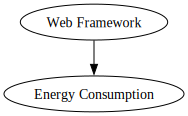

In [23]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

CausalGraphicalModel(
    nodes=["Web Framework", "Energy Consumption"],
    edges=[
        ("Web Framework", "Energy Consumption"),
    ]
).draw()

In [24]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [26]:
# Extract framework name
df[['language', 'framework']] = df['application'].str.extract(r'([^-]+(?:-sharp)?)-(.+)')

# Get unique frameworks
print(df['framework'].unique())

['actix' 'sinatra' 'gorilla' 'gin' 'flask' 'razor' 'express']


In [27]:
df

,application,endpoint,energy_consumption,runtime,language,framework
0,rust-actix,/api/register,0.449358,0.148812,rust,actix
1,rust-actix,/api/register,0.433871,0.148895,rust,actix
2,rust-actix,/api/register,0.270844,0.094729,rust,actix
3,rust-actix,/api/register,0.479776,0.163467,rust,actix
4,rust-actix,/api/register,0.268833,0.092300,rust,actix
...,...,...,...,...,...,...
1955,javascript-express,/logout,0.096436,0.032214,javascript,express
1956,javascript-express,/logout,0.097559,0.032214,javascript,express
1957,javascript-express,/logout,0.096922,0.032214,javascript,express
1958,javascript-express,/logout,0.097086,0.032214,javascript,express


In [28]:
# Make c-sharp-razor the baseline
df['framework'] = df['framework'].astype('category')
df['framework'] = df['framework'].cat.reorder_categories(
    ['razor' if 'razor' in x else x for x in df['framework'].cat.categories],
    ordered=False
)
df_dummies = pd.get_dummies(df['framework'], drop_first=True)  # drop baseline

# Combine with original data
X = df_dummies
y = df['energy_consumption'].values


To evaluate the hypothesis:

h1: The web framework c-sharp-razor consumes more energy than any other web framework in the dataset.

We build a Bayesian linear regression model where energy consumption is the dependent variable and the web framework is the categorical predictor.

modeling: </br>
1. Starting with Bayesian linear regression model with a Gaussian likelihood.
2. Energy consumption is modeled as a linear function of the framework.

## Bayesian Linear Regression
to explain how energy consumption depends on the web framework.

* We are assuming a **linear model**:

\begin{align}
h_i    & \sim \mathcal N (\mu_i, \sigma)         & \quad [\,\text{likelihood}\, h \text{ predicted var}]   \\
\mu_i  & =    \alpha + \beta_{F[i]}  & \quad [\,\text{linear model}\, x \text{ predictor}] \\
\alpha & \sim \mathcal N (0, 10)            & \quad [\,\alpha \text{ prior, parameter}\,]        \\
\beta  & \sim \mathcal N (0, 0.2)            & \quad [\,\beta  \text{ prior, parameter}\,]        \\
\sigma & \sim \text{Exponential} (1)             & \quad [\,\sigma \text{ prior, parameter}\,]
\end{align}

The likelihood assumes that the observed energy consumption values $h_{i}$ are normally distributed around the predicted mean $\mu_i$ with a constant standard deviation $\sigma$. 

The mean $\mu_i$ is modeled as a linear combination of the intercept $\alpha$ and the framework effects $\beta$. 

The prior probailities $\alpha$, $\beta$, and $\sigma$ are chosen to be very weakly informative, to reflect our little domain knowledge about the energy consumption of the frameworks.


<!-- Each observed energy consumption value h_{i} (for each request in the dataset) is assumed to be normally distributed with the expected (mean) energy consumption for observation and the constant standard deviation</br>
The mean is linearly dependent on the web framework. The model predicts the _expected_ enrgy ($\mu_i$) and then allows some noise around it.
- $\alpha$: The baseline energy consumption — in our case, this will be the mean energy for the baseline framework (`c-sharp-razor`).

- $\beta_{i}$: The effect of the framework used in observation \( i \), relative to the baseline. Each framework gets its own coefficient (except the baseline, which is 0).

In Bayesian modeling, we need to put priors on all the parameters: $\alpha$, $\beta$, $\sigma$ to express our uncertainty before seeing data.

Based on EDA - we choose priors -->



## Priors

Prior probabilities reasoning:

1. **Intercept** ($\alpha \sim \mathcal N (0, 10)$):
    - Reasoning:
        - The intercept represents the baseline energy consumption for the baseline framework (`c-sharp-razor`).
        - We choose a weakly informative prior with a mean of 0 and a large standard deviation (10) to allow for a wide range of possible values.
        - This reflects our uncertainty about the baseline energy consumption before observing the data.

2. **Framework Effects** ($\beta \sim \mathcal N (0, 0.5)$):
    - Reasoning:
        - The framework effects represent the deviations from the baseline energy consumption for each framework.
        - We choose a weakly informative prior with a mean of 0 and a standard deviation of 0.5 to allow for moderate deviations from the baseline.
        - This reflects our belief that most frameworks will have similar energy consumption to the baseline, but some may deviate significantly.

3. **Standard Deviation of Resiualduals** ($\sigma \sim \text{Exponential} (1)$):
    - Reasoning:
        - The standard deviation of the residuals represents the variability in energy consumption that is not explained by the model.
        - We choose a weakly informative exponential prior with a lambda of 1 to allow for a wide range of possible values.
        - This reflects our uncertainty about the variability in energy consumption before observing the data.

In [19]:
# print(df["energy_consumption"].describe())

<!-- 
!!! Priors should be chosen at an intuituive guess, and checked aferwards afterwards in the data.


Energy is in the 0.019159–0.019159 J range 

Mean is around 0.381162 J

Std dev is about 0.300633

Maybe like that?

α ~ Normal(0.4, 0.2) -  Prior for α (baseline mean energy)

$\beta_{i}$ ~ Normal(0, 0.2)

σ ~ HalfNormal(0.3) - Prior for $\sigma$ (standard deviation) -  if the sample standard deviation of energy consumption is closer to 0.3, then your prior for σ should be adjusted to reflect that wider variability in the data. -->

In [ ]:
with pm.Model() as model_h1:
    # Priors
    alpha = pm.Normal("alpha", mu = 0, sigma = 10)  # Based on rough average
    betas = pm.Normal("betas", mu = 0, sigma = 0.5, shape=X.shape[1])
    sigma = pm.Exponential("sigma", lam = 1)
    
    # Expected value
    mu = alpha + pm.math.dot(X.values, betas)
    
    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace_h1 = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.37,0.01,0.35,0.38,0.0,0.0,4303.23,5606.33,1.0
betas[0],-0.10,0.01,-0.12,-0.07,0.0,0.0,6809.63,6272.44,1.0
betas[1],0.03,0.01,0.00,0.05,0.0,0.0,5703.05,6071.12,1.0
betas[2],-0.03,0.01,-0.05,-0.00,0.0,0.0,7109.32,6134.59,1.0
betas[3],-0.03,0.01,-0.05,-0.00,0.0,0.0,7893.70,6141.86,1.0
betas[4],0.19,0.01,0.17,0.22,0.0,0.0,6960.46,6359.75,1.0
betas[5],0.02,0.01,-0.00,0.05,0.0,0.0,7160.46,5869.06,1.0
sigma,0.27,0.00,0.26,0.28,0.0,0.0,7256.44,6416.14,1.0


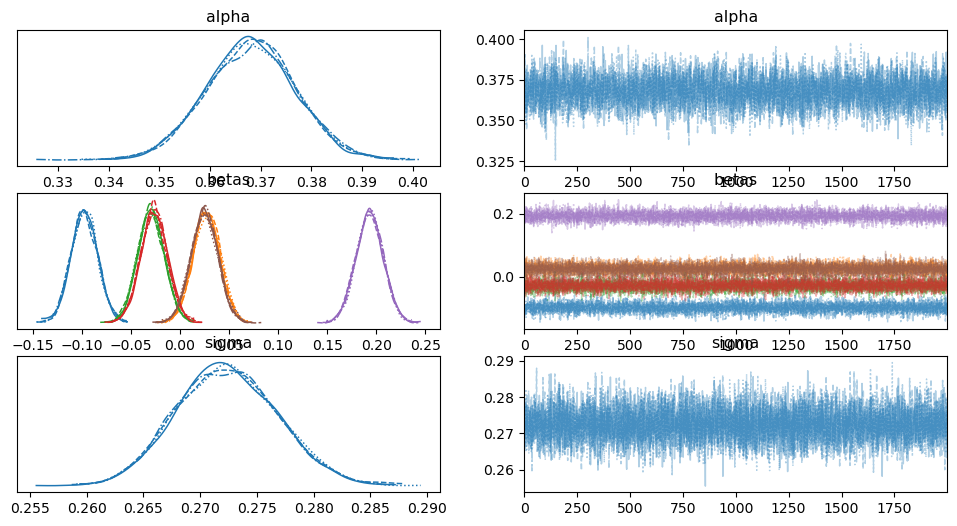

In [31]:
az.plot_trace(trace_h1)
az.summary(trace_h1, round_to=2)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

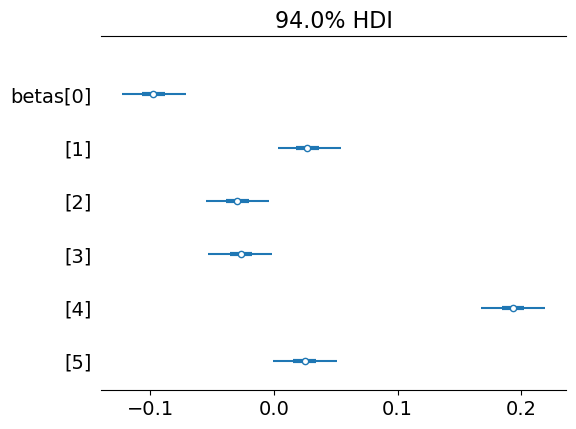

In [32]:
az.plot_forest(trace_h1, var_names=["betas"], combined=True)

### HDI: Highest Density Interval

This gives the probability that each framework consumes less energy than c-sharp-razor. High probabilities (e.g., > 0.95) support H1.

In [33]:
posterior = trace_h1.posterior
prob_csharp_more = (posterior['betas'] < 0).mean(dim=("chain", "draw"))
print(prob_csharp_more)


<xarray.DataArray 'betas' (betas_dim_0: 6)> Size: 48B
array([1.      , 0.026   , 0.983625, 0.9725  , 0.      , 0.03575 ])
Coordinates:
  * betas_dim_0  (betas_dim_0) int64 48B 0 1 2 3 4 5


Quickly trying something:

In [43]:
with model_h1:
    h1_data = pm.sample_posterior_predictive(trace_h1, var_names=["y_obs"], random_seed=42)

Sampling: [y_obs]


Output()

In [42]:
az.plot_ppc(
    trace_h1,
    num_pp_samples=100,
    figsize=(12, 6),
    var_names=["y_obs"],
    coords={"chain": [0]},
    backend="matplotlib",
)

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

_____________________________________________________________________________________
Julias idea for H1:

In [ ]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

# Get number of frameworks (excluding baseline)
n_frameworks = X.shape[1]

with pm.Model() as model:
    # Priors
    alpha = pm.Normal("alpha", mu=0.4, sigma=0.2)  # updated intercept prior
    beta = pm.Normal("beta", mu=0, sigma=0.2, shape=n_frameworks)  # updated beta prior
    sigma = pm.HalfNormal("sigma", sigma=0.3)  # updated sigma prior

    # Framework index for each row (dummy variables)
    mu = alpha + pm.math.dot(X, beta)  # Use dot product to calculate the linear combination

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Prior predictive
    prior_pred = pm.sample_prior_predictive()




In [ ]:
with model:
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

In [ ]:
az.summary(trace, var_names=["alpha", "beta", "sigma"])
az.plot_trace(trace, var_names=["alpha", "beta", "sigma"])
az.plot_autocorr(trace, var_names=["alpha", "beta", "sigma"])

In [ ]:
with model:
    posterior_pred = pm.sample_posterior_predictive(trace)

az.plot_ppc(trace, data_pairs={"y_obs": "y_obs"})

_________________
* **H2** - The programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset.
_________________

In [34]:
### DATA PREPROCESSING ###

# Get unique programming languages
print(df['language'].unique())

['rust' 'ruby' 'go' 'python' 'c-sharp' 'javascript']


In [35]:
df['language'] = df['language'].astype('category')
df['language'] = df['language'].cat.reorder_categories(
    ['javascript'] + [cat for cat in df['language'].cat.categories if cat != 'javascript'],
    ordered=False
)

X_lang = pd.get_dummies(df['language'], drop_first=True)
y = df['energy_consumption'].values

In [36]:
with pm.Model() as model_h2:
    alpha = pm.Normal("alpha", mu=0.3, sigma=0.1)  # Mean energy for javascript
    betas = pm.Normal("betas", mu=0, sigma=0.05, shape=X_lang.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=0.1)

    mu = alpha + pm.math.dot(X_lang.values, betas)

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace_h2 = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.37,0.02,0.34,0.41,0.0,0.0,4179.35,5082.93,1.0
betas[1],0.04,0.02,0.01,0.07,0.0,0.0,3807.63,5019.78,1.0
betas[2],0.12,0.02,0.09,0.16,0.0,0.0,4167.92,4994.78,1.0
betas[3],0.12,0.02,0.08,0.16,0.0,0.0,4208.33,5125.24,1.0
betas[4],0.03,0.02,-0.01,0.06,0.0,0.0,4161.13,4634.11,1.0


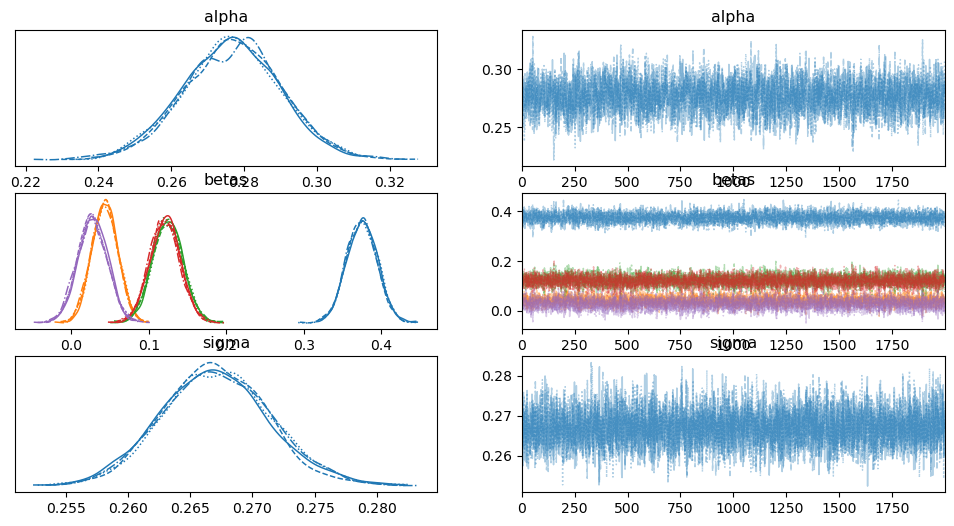

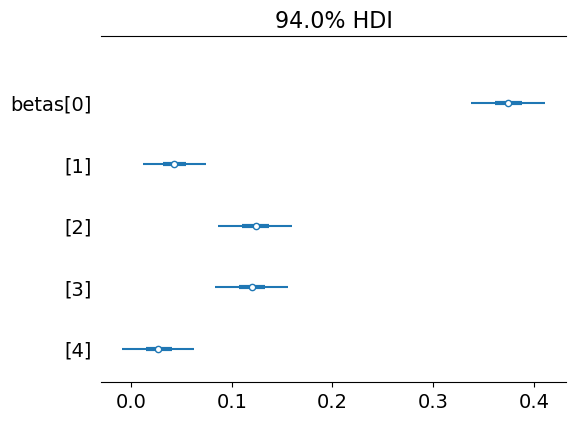

In [39]:
az.plot_trace(trace_h2)
az.plot_forest(trace_h2, var_names=["betas"], combined=True)

az.summary(trace_h2, var_names=["betas"], round_to=2)

In [40]:
posterior = trace_h2.posterior
prob_others_more_than_js = (posterior['betas'] > 0).mean(dim=["chain", "draw"])
print(prob_others_more_than_js)

<xarray.DataArray 'betas' (betas_dim_0: 5)> Size: 40B
array([1.      , 0.996125, 1.      , 1.      , 0.922   ])
Coordinates:
  * betas_dim_0  (betas_dim_0) int64 40B 0 1 2 3 4


_________________
* **H3** - Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.
_________________